# Importing All The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import json

# 1) Data Gathering

In [2]:
df1 = pd.read_csv('CSV_FILES/Admission_Predict.csv')
df1.drop('Serial No.',axis=1,inplace=True)

In [3]:
admission_df = df1.copy()

# 2) EDA (Exploratory Data Analysis)

In [4]:
# Check For Data Types

admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [5]:
# Finding Number of Missing Values

df1.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Checking Data Types in Detail

admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
admission_df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [8]:
admission_df.corr().tail(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Chance of Admit,0.80261,0.791594,0.71125,0.675732,0.669889,0.873289,0.553202,1.0


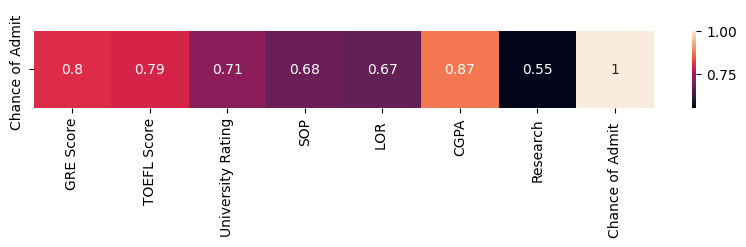

In [9]:
plt.figure(figsize=(10,1))
sns.heatmap(admission_df.corr().tail(1),annot=True)
plt.show()

In [10]:
# Splitting Data Into Independent And Dependent 

x = admission_df.drop("Chance of Admit ",axis=1)
y = admission_df["Chance of Admit "]

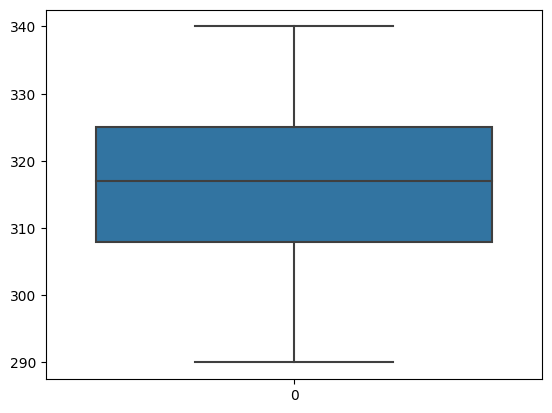

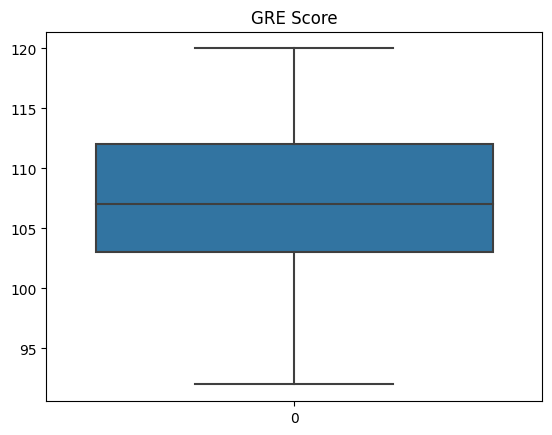

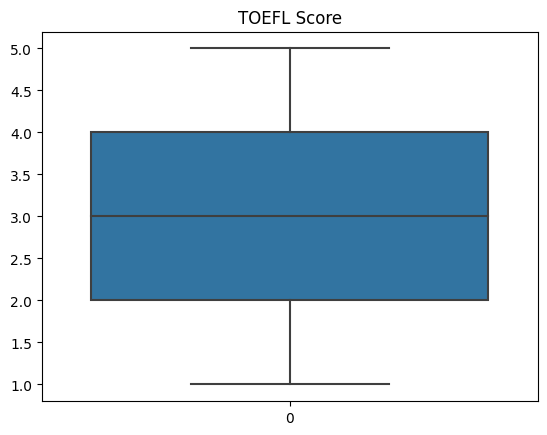

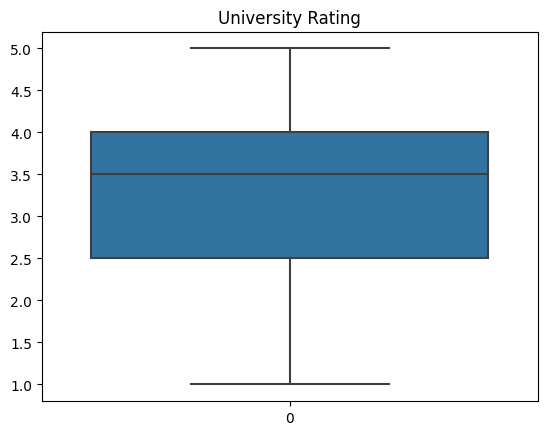

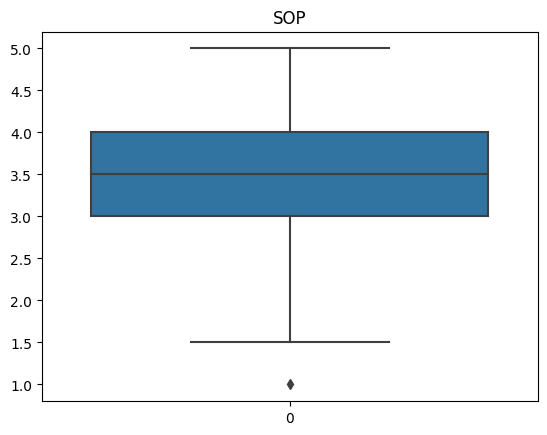

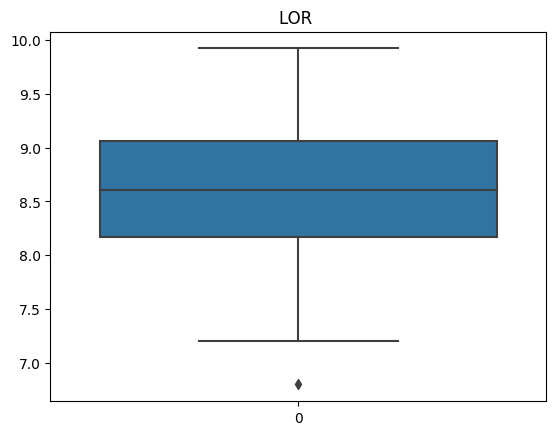

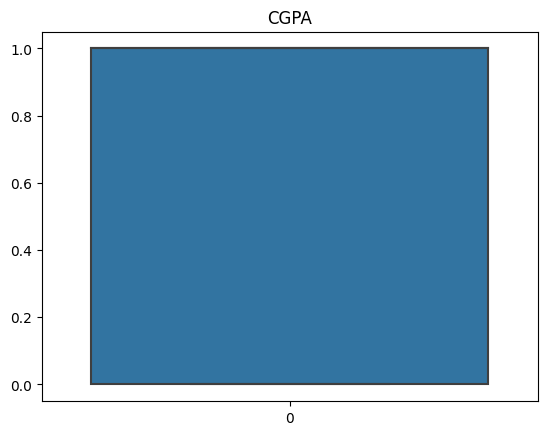

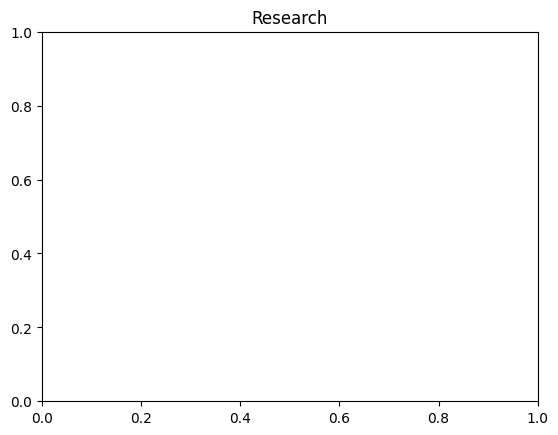

In [11]:
# Checking For Outliers

for col in x.columns:
    sns.boxplot(x[col])
    plt.show()
    plt.title(col)
    

# 3) Feature Engineering

In [12]:
# Scaling Data For Distance Base Algorithm

scaler = MinMaxScaler()
scaler.fit(x)
array1 = scaler.transform(x)
x_scaled = pd.DataFrame(array1,columns=x.columns)

# 4) Feature Selection

# 5) Model Training & Evaluation

#### Train-Test Split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=.80,random_state=35)

### 1) Linear Regression Model

In [14]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [15]:
# Training Data Evaluation

y_train_pred = linear_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,y_train_pred)
r_2_score = r2_score(y_train,y_train_pred)

print('MSE       :',mse)
print('RMSE      :',rmse)
print('MAE       :',mae)
print('*'*50)
print('R_2_Score :',r_2_score)

MSE       : 0.0039296900860525796
RMSE      : 0.06268724021722906
MAE       : 0.04531535510930521
**************************************************
R_2_Score : 0.8007919382511929


In [16]:
# Testing Data Evaluation

y_test_pred = linear_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)
r_2_score = r2_score(y_test,y_test_pred)

print('MSE       :',mse)
print('RMSE      :',rmse)
print('MAE       :',mae)
print('*'*50)
print('R_2_Score :',r_2_score)

MSE       : 0.00434784031707656
RMSE      : 0.06593815524471822
MAE       : 0.046256315829722706
**************************************************
R_2_Score : 0.8069737750079602


### 2) KNN Regressor

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,train_size=.80,random_state=30)

In [18]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [19]:
# Training Data Evaluation

y_train_pred = knn_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,y_train_pred)
r_2_score = r2_score(y_train,y_train_pred)

print('MSE       :',mse)
print('RMSE      :',rmse)
print('MAE       :',mae)
print('*'*50)
print('R_2_Score :',r_2_score)

MSE       : 0.0036013874999999995
RMSE      : 0.060011561386119586
MAE       : 0.041931249999999996
**************************************************
R_2_Score : 0.819405207024186


In [20]:
# TestingData Evaluation

y_test_pred = knn_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)
r_2_score = r2_score(y_test,y_test_pred)

print('MSE       :',mse)
print('RMSE      :',rmse)
print('MAE       :',mae)
print('*'*50)
print('R_2_Score :',r_2_score)

MSE       : 0.004983950000000001
RMSE      : 0.07059709625756573
MAE       : 0.051925
**************************************************
R_2_Score : 0.7694156972625357


# 6) Hypertuning the Parameters

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=.80,random_state=30)

In [22]:
lasso_model = Lasso(alpha=1)
param_grid = {'alpha':np.arange(0.001,2,0.001)}
gscv = GridSearchCV(lasso_model,param_grid,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00])})

In [23]:
gscv.best_estimator_

Lasso(alpha=0.001)

In [24]:
lasso_model = gscv.best_estimator_
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.001)

In [25]:
# Training Data Evaluation

y_train_pred = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,y_train_pred)
r_2_score = r2_score(y_train,y_train_pred)

print('MSE       :',mse)
print('RMSE      :',rmse)
print('MAE       :',mae)
print('*'*50)
print('R_2_Score :',r_2_score)

MSE       : 0.004120606245147157
RMSE      : 0.06419194844485683
MAE       : 0.045868756260568355
**************************************************
R_2_Score : 0.7933685192784178


In [26]:
# Testing Data Evaluation

y_test_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_test_pred)
r_2_score = r2_score(y_test,y_test_pred)

print('MSE       :',mse)
print('RMSE      :',rmse)
print('MAE       :',mae)
print('*'*50)
print('R_2_Score :',r_2_score)

MSE       : 0.003607958657451747
RMSE      : 0.0600662855306681
MAE       : 0.04101331070620397
**************************************************
R_2_Score : 0.8330764491349013


# 7) Saving All Required Data

In [27]:
with open('artifacts/Linear_Model.pkl','wb') as f:
    pickle.dump(linear_model,f)

In [28]:
column_names_list = x.columns.to_list()
project_data = {'column_names':column_names_list}

In [29]:
with open ('artifacts/Project_Data.json','w') as f:
    json.dump(project_data,f)
    

In [30]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')